![](Images/2022-11-26-10-16-22.png)

### we need to define the number of points
N

In [8]:
import pyomo.environ as pyo
import random

In [10]:
random.uniform(0,1)

0.7648033722009466

In [38]:
# initiate the model
model = pyo.AbstractModel()

# Declare the parameters and variables
model.N = pyo.Param(mutable=True)
model.I = pyo.RangeSet(1, model.N)
model.J = pyo.Set(initialize=model.I)

# initialize the x and y with random variables
def initval(model, i):
    return random.uniform(0,1)

# if the variable has an index we have to pass the index set as a parameter
model.x = pyo.Var(model.I, bounds=(0,1), within=pyo.NonNegativeReals, initialize=initval)
model.y = pyo.Var(model.J, bounds=(0,1), within=pyo.NonNegativeReals, initialize=initval)
model.r = pyo.Var(within=pyo.NonNegativeReals)

# Declare the constrains
# if you have i and j indices its better to define the constrains like a function
def constraint_rule(model,i,j):
    # condition for get the distance between points not with the same point
    if i !=j:
        return (model.x[i] - model.x[j])**2 + (model.y[i] - model.y[j])**2 >= model.r**2
    else:
        return pyo.Constraint.Skip
# if we defined function with indices we have to pass the sets in the constrains
model.con = pyo.Constraint(model.I, model.J, rule=constraint_rule)

# Declare the objective function
model.OF = pyo.Objective(expr= model.r, sense=pyo.maximize)

# initialize th solver
opt = pyo.SolverFactory('ipopt')
model.N = 20
instance = model.create_instance()
results = opt.solve(instance)

results.write()

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 380
  Number of variables: 41
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.11.1\x3a Optimal Solution

In [39]:
instance.pprint()

2 Set Declarations
    J : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
    con_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    I*J :  400 : {(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4

Min. Distance:  0.2866114859219151


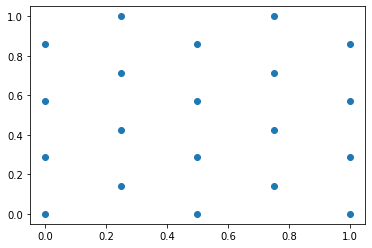

In [40]:
# visualize the results
import matplotlib.pyplot as plt

x= [pyo.value(instance.x[i]) for i in instance.I]
y= [pyo.value(instance.y[i]) for i in instance.I]

plt.scatter(x,y)
print('Min. Distance: ', pyo.value(instance.r))